In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Starting point: x = 6
iteration 1: x = 5.951783350058593, f(x) = -25.423725046034683
iteration 2: x = 5.9018846183310805, f(x) = -24.832242048093
iteration 3: x = 5.8220248599447535, f(x) = -23.895973469814727
iteration 4: x = 5.7248331999775575, f(x) = -22.77371516756528
iteration 5: x = 5.625061763840443, f(x) = -21.641319847019755
iteration 6: x = 5.54115092755095, f(x) = -20.704353601898752
iteration 7: x = 5.499216828031502, f(x) = -20.24138572170485
iteration 8: x = 5.41718170027062, f(x) = -19.34585757374689
iteration 9: x = 5.372308524533046, f(x) = -18.86169888277043
iteration 10: x = 5.288783122172375, f(x) = -17.971226913375375
iteration 11: x = 5.2089046262155945, f(x) = -17.132687405010223
iteration 12: x = 5.114243985148035, f(x) = -16.155491539622858
iteration 13: x = 5.01857128711904, f(x) = -15.186057763895661
iteration 14: x = 4.923127802252772, f(x) = -14.237187357314205
iteration 15: x = 4.83100354366971, f(x) = -13.338595238949296
iteration 16: x = 4.74261373243501

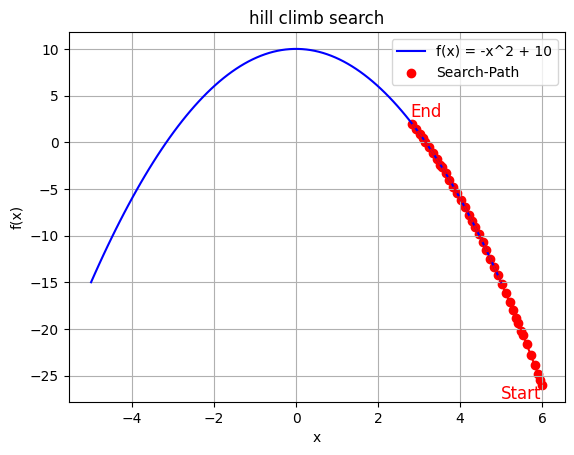


Best solution found: x = [6, 5.951783350058593, 5.9018846183310805, 5.8220248599447535, 5.7248331999775575, 5.625061763840443, 5.54115092755095, 5.499216828031502, 5.41718170027062, 5.372308524533046, 5.288783122172375, 5.2089046262155945, 5.114243985148035, 5.01857128711904, 4.923127802252772, 4.83100354366971, 4.74261373243501, 4.645100996200873, 4.554240294914557, 4.454545139285901, 4.36390107647726, 4.295438390901722, 4.212131800936868, 4.112603313880739, 4.028872397234386, 3.9325872627435046, 3.8409881691369727, 3.7427675855467886, 3.6510081754480304, 3.5606594479056892, 3.52104007114956, 3.4332713024587536, 3.334841503525004, 3.2476130933137695, 3.1560333788919017, 3.085713782309108, 3.0261120440689986, 2.933205696444201, 2.8362627244381464], f(x) = [-26, -25.423725046034683, -24.832242048093, -23.895973469814727, -22.77371516756528, -21.641319847019755, -20.704353601898752, -20.24138572170485, -19.34585757374689, -18.86169888277043, -17.971226913375375, -17.132687405010223, -16

In [4]:
from operator import ifloordiv
#Define the objective fn to maximize (f(x) = -x^2 + 10)
def objective_function(x):
  return -(x**2) + 10

#Function to generate neighbors around a current state
def get_neighbors(x, step_size=0.1, num_neighbors=10):
  neighbors = [x + random.uniform(-step_size, step_size) for _ in range(num_neighbors)]
  return neighbors


#visualization function to plot the hill and the climbing steps 
def plot_hill_climbing(x_history, f_history):
  x_vals = np.linspace(-5,5,100)
  y_vals = objective_function(x_vals)
  plt.plot(x_vals,y_vals,label="f(x) = -x^2 + 10", color='blue') # the hill
  plt.scatter(x_history,f_history,color='red',marker="o",label="Search-Path") #path taken
  plt.plot(x_history,f_history,color='red',linestyle='--')

  #annotating points
  plt.annotate('Start', (x_history[0], f_history[0]), textcoords="offset points",xytext = [-15,-10],ha='center',color='red',fontsize=12)  
  plt.annotate('End', (x_history[-1], f_history[-1]), textcoords="offset points",xytext = [10,5],ha='center',color='red',fontsize=12)  

  plt.title("hill climb search")
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.legend()
  plt.grid(True)
  plt.show()

#hill climbing algo (steepest ascent) starting at 0
def hill_climbing(start_x=0, max_iterations=1000,step_size=0.1):
  current_x = start_x
  current_value = objective_function(current_x)

  #store iterations for plotting
  x_history = [current_x]
  f_history = [current_value]

  for iteration in range(max_iterations):
    #generate neighbors of the current state
    neighbors = get_neighbors(current_x, step_size)

    #evaluate all neighbors and find the best one
    best_neighbor = None
    best_value = current_value

    for neighbor in neighbors:
      neighbor_value = objective_function(neighbor)
      if neighbor_value > best_value: #move to the higher neighbor
        best_neighbor = neighbor_value
        best_value = neighbor_value
        best_neighbor = neighbor
    
    #if no improvement, stop the algorithm (local maxima reached)
    if best_neighbor is None:
      print(f"Local Maxima reached at x = {current_x}, f(x) = {current_value}")
      break

    #move to the best neighbor
    current_x = best_neighbor
    current_value = best_value

    #store the current state for plotting
    x_history.append(current_x)
    f_history.append(current_value)

    #print the iteration details
    print(f"iteration {iteration + 1}: x = {current_x}, f(x) = {current_value}")
  
  plot_hill_climbing(x_history, f_history)

  return x_history, f_history

if __name__ == "__main__":
  
  random.seed(0)

  #starting from x = 0
  start_x = 6
  print(f"Starting point: x = {start_x}")

  #Run hill climbing
  best_x, best_value = hill_climbing(start_x)
  print(f"\nBest solution found: x = {best_x}, f(x) = {best_value}")

  
  